# Pokemon - Kaggle challenge
## 0. Importing libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #data viz : here for heatmap viz
%mathplot inline #not to call plt.show() everytime ;P

UsageError: Line magic function `%mathplot` not found.


In [2]:
pokemons=pd.read_csv('original_data/1.pokemon.csv', index_col=0)
combats=pd.read_csv('original_data/1.combats.csv')

## 1. Exploring data

In [3]:
print('---------INFO---------')
print(pokemons.info())
#print '---------TAIL---------'
#print pokemons.tail()
print('---------HEAD---------')
pokemons.head()
# Ohhhh we have until generation 6 !!

---------INFO---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB
None
---------HEAD---------


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
print '---------INFO---------'
print combats.info()
#print '---------TAIL---------'
#print combats.tail()
print '---------HEAD---------'
combats.head()

---------INFO---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB
None
---------HEAD---------


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
print('Shape of pokemons dataset:',pokemons.shape)
print('Shape of combats dataset:',combats.shape)

('Shape of pokemons dataset:', (800, 11))
('Shape of combats dataset:', (50000, 3))


In [6]:
pokemons.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


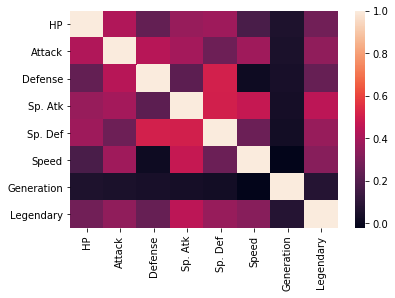

In [7]:
sns.heatmap(pokemons.corr())
plt.show()# useless because of %mathplot inline

In [8]:
pokemons.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


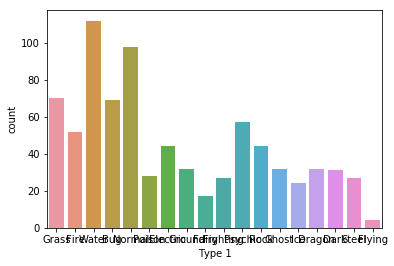

In [9]:
print(pokemons['Type 1'].value_counts(dropna =False))
sns.countplot(x='Type 1', data=pokemons)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64


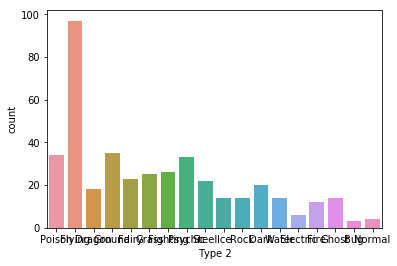

In [10]:
print(pokemons['Type 2'].value_counts(dropna =False))
sns.countplot(x='Type 2', data=pokemons)

In [11]:
#pokemons['Type 1'] = pokemons['Type 1'].astype('category') #categorical data uses less memory, speed up operations like groupby
#pokemons['Type 2'] = pokemons['Type 2'].astype('category')
#pokemons.info()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115c84950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115eb5b90>], dtype=object)

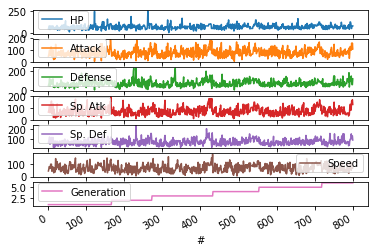

In [12]:
pokemons.plot(subplots = True)


In [13]:
print(pokemons['HP'][2]==pokemons.HP[2])
print(pokemons.HP[2]==pokemons.loc[2]['HP'])

print(type(pokemons[['HP']]))
print(type(pokemons['HP']))
print(pokemons.loc[10:1:-1,"Defense":"HP":-1])

True
True
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
    Defense  Attack  HP
#                      
10       65      48  44
9        78     104  78
8       111     130  78
7        78      84  78
6        58      64  58
5        43      52  39
4       123     100  80
3        83      82  80
2        63      62  60
1        49      49  45


In [14]:
data1 = pokemons.set_index(["Type 1","Type 2"])
data1.head(10)

Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                   
Grass  Poison         Bulbasaur  45      49       49       65       65     45   
       Poison           Ivysaur  60      62       63       80       80     60   
       Poison          Venusaur  80      82       83      100      100     80   
       Poison     Mega Venusaur  80     100      123      122      120     80   
Fire   NaN           Charmander  39      52       43       60       50     65   
       NaN           Charmeleon  58      64       58       80       65     80   
       Flying         Charizard  78      84       78      109       85    100   
       Dragon  Mega Charizard X  78     130      111      130       85    100   
       Flying  Mega Charizard Y  78     104       78      159      115    100   
Water  NaN             Squirtle  44      48       65       50       64     43   

               Generation  Legendary  
Type 1 Type 2                         
Grass  Poison           1      False  
       Poison           1      False  
       Poison           1      False  
       Poison           1      False  
Fire   NaN              1      False  
       NaN              1      False  
       Flying           1      False  
       Dragon           1      False  
       Flying           1      False  
Water  NaN              1      False

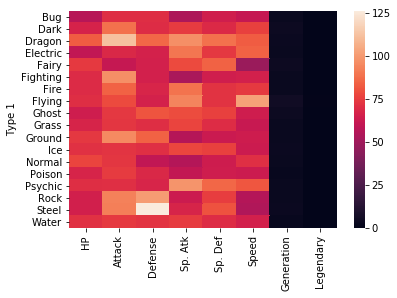

In [15]:
pokemons.groupby("Type 1").mean()

sns.heatmap(pokemons.groupby("Type 1").mean())

## 2. Data preparation
We need to merge the combats dataset with the one containing all the features of the pokemons.

In [16]:
combats_train=combats
combats_train.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [17]:
# first add all the features of both pokemons in the same table
for i in ['First_pokemon','Second_pokemon']:
    for j in pokemons.columns:
        combats_train[i+' '+j]=pokemons.loc[combats_train[i],[j]].reset_index()[j] # it took me long to get this short & beautiful function

combats_train.head().columns

Index([u'First_pokemon', u'Second_pokemon', u'Winner', u'First_pokemon Name',
       u'First_pokemon Type 1', u'First_pokemon Type 2', u'First_pokemon HP',
       u'First_pokemon Attack', u'First_pokemon Defense',
       u'First_pokemon Sp. Atk', u'First_pokemon Sp. Def',
       u'First_pokemon Speed', u'First_pokemon Generation',
       u'First_pokemon Legendary', u'Second_pokemon Name',
       u'Second_pokemon Type 1', u'Second_pokemon Type 2',
       u'Second_pokemon HP', u'Second_pokemon Attack',
       u'Second_pokemon Defense', u'Second_pokemon Sp. Atk',
       u'Second_pokemon Sp. Def', u'Second_pokemon Speed',
       u'Second_pokemon Generation', u'Second_pokemon Legendary'],
      dtype='object')

### (a) NUMERICAL FEATURES | 1st observation: level difference & numerical statistics difference

In pokemon’s games, pokemons have a level between 0 and 100 that rather reflects the numerical performances: attack, defence, speed, etc. And pokemon level 100 is really likely to beat all pokemons with a lower level.
Based on this observation about numerical performances, we decided to create new columns related to the difference of every numerical feature: feature_i_{pokemon 1}-feature_i_{pokemon 2} with feature_i, one of numerical feature.

In [18]:
# creating columns equivalent to differences of numerical features 1st_pokemon LESS 2nd_pokemon
for i in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']:
    combats_train['Diff_'+i.replace(' ','')]=combats_train['First_pokemon '+i]-combats_train['Second_pokemon '+i]

### (b) NUMERICAL FEATURES | 2nd observation: attack-defence difference.
We relied on another assumption : the attack of a pokemon is always more efficient if the pokemon attacked has a lower defence. 
So, as Special moves are not crossed with Normal moves, we dediced to create following features:

In [19]:
# creating columns evaluating the crossed differences Attack & Defense AND Special Attack & Special Defense (NOT crossed features such as Special X - Normal X with X=Attack or Defense because it makes no sense for pokemons)
combats_train['Diff_Atk1-Def2']=combats_train['First_pokemon Attack']-combats_train['Second_pokemon Defense']
combats_train['Diff_Def1-Atk2']=combats_train['First_pokemon Defense']-combats_train['Second_pokemon Attack']
combats_train['Diff_Sp.Atk1-Sp.Def2']=combats_train['First_pokemon Sp. Atk']-combats_train['Second_pokemon Sp. Def']
combats_train['Diff_Sp.Def1-Sp.Atk2']=combats_train['First_pokemon Sp. Def']-combats_train['Second_pokemon Sp. Atk']
combats_train['Winner_first']=combats_train['First_pokemon']==combats_train['Winner']

combats_train.head().columns

Index([u'First_pokemon', u'Second_pokemon', u'Winner', u'First_pokemon Name',
       u'First_pokemon Type 1', u'First_pokemon Type 2', u'First_pokemon HP',
       u'First_pokemon Attack', u'First_pokemon Defense',
       u'First_pokemon Sp. Atk', u'First_pokemon Sp. Def',
       u'First_pokemon Speed', u'First_pokemon Generation',
       u'First_pokemon Legendary', u'Second_pokemon Name',
       u'Second_pokemon Type 1', u'Second_pokemon Type 2',
       u'Second_pokemon HP', u'Second_pokemon Attack',
       u'Second_pokemon Defense', u'Second_pokemon Sp. Atk',
       u'Second_pokemon Sp. Def', u'Second_pokemon Speed',
       u'Second_pokemon Generation', u'Second_pokemon Legendary', u'Diff_HP',
       u'Diff_Attack', u'Diff_Defense', u'Diff_Sp.Atk', u'Diff_Sp.Def',
       u'Diff_Speed', u'Diff_Atk1-Def2', u'Diff_Def1-Atk2',
       u'Diff_Sp.Atk1-Sp.Def2', u'Diff_Sp.Def1-Sp.Atk2', u'Winner_first'],
      dtype='object')


Now let's deal with the rest of categorical categorical features! ie Type 1 & Type 2 of both pokemons.

### (c) CATEGORICAL FEATURES | 3rd observation: sensibility of pokemons to specific types
Pokemons of one type are really likely to beat pokemons of another type even if they have same numerical statistics. For example, an electric pokemon damages much and beats more easily a water pokemon.
We discovered that this bonus damage (relied on type of attacking pokemon/ type of defending pokemon) has been numerically measured and reported in tables on the Web as the following one:

In [20]:
metrix=pd.read_csv('original_data/2.type_chart.csv')
print('Shape: ' + str(metrix.shape))
metrix.head()

Shape: (801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [21]:
columns_mapper={}
for i in metrix.columns:
    if i[0:8]=='against_':
        columns_mapper[i]=i[8:]
columns_mapper['against_fight']='fighting'
columns_mapper

{'against_bug': 'bug',
 'against_dark': 'dark',
 'against_dragon': 'dragon',
 'against_electric': 'electric',
 'against_fairy': 'fairy',
 'against_fight': 'fighting',
 'against_fire': 'fire',
 'against_flying': 'flying',
 'against_ghost': 'ghost',
 'against_grass': 'grass',
 'against_ground': 'ground',
 'against_ice': 'ice',
 'against_normal': 'normal',
 'against_poison': 'poison',
 'against_psychic': 'psychic',
 'against_rock': 'rock',
 'against_steel': 'steel',
 'against_water': 'water'}

In [22]:
metrix=metrix.rename(columns_mapper,axis='columns')
relevant_col=['type1','type2','bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
metrix=metrix[relevant_col]
metrix=metrix.drop_duplicates().sort_values(['type1','type2'], ascending=[1, 1]).reset_index(drop=True)
print 'Shape: '+ str(metrix.shape)
metrix.head(5)

Shape: (166, 20)


,type1,type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,bug,electric,1.0,1.0,1.0,0.5,1.0,0.50,2.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0
1,bug,fairy,0.5,0.5,0.0,1.0,1.0,0.25,2.0,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,2.0,2.0,1.0
2,bug,fighting,0.5,0.5,1.0,1.0,2.0,0.50,2.0,4.0,1.0,0.50,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0
3,bug,fire,0.5,1.0,1.0,1.0,0.5,0.50,1.0,2.0,1.0,0.25,1.0,0.5,1.0,1.0,1.0,4.0,0.5,2.0
4,bug,flying,0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0


In [23]:
pok=pokemons[['Type 1','Type 2']].drop_duplicates().sort_values(['Type 1','Type 2'], ascending=[1, 1]).reset_index(drop=True)
print pok.shape
pok.head(5)

(154, 2)


,Type 1,Type 2
0,Bug,Electric
1,Bug,Fighting
2,Bug,Fire
3,Bug,Flying
4,Bug,Ghost


metrix seems to contain more cases than pokemons! 

In [24]:
def lookup(t1, t2, ag):
    t1 = t1.lower()
    t2 = t2.lower()
    ag = ag.lower()
    for i in range(metrix.shape[0]):
        if metrix['type1'][i] == t1 and metrix['type2'][i] == t2:
            result = metrix[ag][i]
            return result
    return 0

In [25]:
comb = combats_train.fillna('0') #in case Type 2 is NaN
vs = pd.DataFrame(np.zeros((comb.shape[0],4)), columns=['FvsS1', 'FvsS2', 'SvsF1', 'SvsF2'])

In [26]:
import time
ping=time.time()

for i in range(comb.shape[0]):
    pong=time.time()
    if i % 2000 == 0:
        print 'Progress: '+str(i)+'/50000 - Computation time: '+ str(round(-(ping-pong),1))+' seconds'
        
    F_type1 = comb['First_pokemon Type 1'][i]    
    F_type2 = comb['First_pokemon Type 2'][i]

    if F_type2 == '0':
        F_type2 = F_type1
    
    S_type1 = comb['Second_pokemon Type 1'][i]    
    S_type2 = comb['Second_pokemon Type 2'][i]
        
    if S_type2 == '0':
        S_type2 = S_type1

    vs['FvsS1'][i] = lookup(F_type1, F_type2, S_type1)
    vs['FvsS2'][i] = lookup(F_type1, F_type2, S_type2)
    vs['SvsF1'][i] = lookup(S_type1, S_type2, F_type1)
    vs['SvsF2'][i] = lookup(S_type1, S_type2, F_type2)
    
print '50000/50000'
pong=time.time()
print('Total computation time: '+str(round(-(ping-pong),1))+' seconds')

Progress: 0/50000 - Computation time: 0.0 seconds
Progress: 2000/50000 - Computation time: 17.0 seconds
Progress: 4000/50000 - Computation time: 34.6 seconds
Progress: 6000/50000 - Computation time: 76.1 seconds
Progress: 8000/50000 - Computation time: 96.4 seconds
Progress: 10000/50000 - Computation time: 114.4 seconds
Progress: 12000/50000 - Computation time: 131.1 seconds
Progress: 14000/50000 - Computation time: 148.0 seconds
Progress: 16000/50000 - Computation time: 165.9 seconds
Progress: 18000/50000 - Computation time: 182.5 seconds
Progress: 20000/50000 - Computation time: 200.4 seconds
Progress: 22000/50000 - Computation time: 216.3 seconds
Progress: 24000/50000 - Computation time: 233.0 seconds
Progress: 26000/50000 - Computation time: 250.5 seconds
Progress: 28000/50000 - Computation time: 267.2 seconds
Progress: 30000/50000 - Computation time: 283.6 seconds
Progress: 32000/50000 - Computation time: 301.3 seconds
Progress: 34000/50000 - Computation time: 318.5 seconds
Progre

In [27]:
vs.to_csv("vs.csv", index=False)
vs.head()

,FvsS1,FvsS2,SvsF1,SvsF2
0,4.0,1.0,1.0,0.5
1,0.5,1.0,2.0,2.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,2.0,2.0


In [28]:
data=pd.concat([combats_train,vs], axis=1, sort=False)
data.head().columns

Index([u'First_pokemon', u'Second_pokemon', u'Winner', u'First_pokemon Name',
       u'First_pokemon Type 1', u'First_pokemon Type 2', u'First_pokemon HP',
       u'First_pokemon Attack', u'First_pokemon Defense',
       u'First_pokemon Sp. Atk', u'First_pokemon Sp. Def',
       u'First_pokemon Speed', u'First_pokemon Generation',
       u'First_pokemon Legendary', u'Second_pokemon Name',
       u'Second_pokemon Type 1', u'Second_pokemon Type 2',
       u'Second_pokemon HP', u'Second_pokemon Attack',
       u'Second_pokemon Defense', u'Second_pokemon Sp. Atk',
       u'Second_pokemon Sp. Def', u'Second_pokemon Speed',
       u'Second_pokemon Generation', u'Second_pokemon Legendary', u'Diff_HP',
       u'Diff_Attack', u'Diff_Defense', u'Diff_Sp.Atk', u'Diff_Sp.Def',
       u'Diff_Speed', u'Diff_Atk1-Def2', u'Diff_Def1-Atk2',
       u'Diff_Sp.Atk1-Sp.Def2', u'Diff_Sp.Def1-Sp.Atk2', u'Winner_first',
       u'FvsS1', u'FvsS2', u'SvsF1', u'SvsF2'],
      dtype='object')

# 2. Classifying

In [29]:
features=['Diff_HP', 'Diff_Attack', 'Diff_Defense', 'Diff_Sp.Atk', 'Diff_Sp.Def', 'Diff_Speed',
 'Diff_Atk1-Def2', 'Diff_Def1-Atk2', 'Diff_Sp.Atk1-Sp.Def2', 'Diff_Sp.Def1-Sp.Atk2',
 'FvsS1', 'FvsS2', 'SvsF1', 'SvsF2', 'Winner_first']

data=data[features]

In [30]:
data.head()

,Diff_HP,Diff_Attack,Diff_Defense,Diff_Sp.Atk,Diff_Sp.Def,Diff_Speed,Diff_Atk1-Def2,Diff_Def1-Atk2,Diff_Sp.Atk1-Sp.Def2,Diff_Sp.Def1-Sp.Atk2,FvsS1,FvsS2,SvsF1,SvsF2,Winner_first
0,-20,-6,10,-15,10,-19,24,-20,5,-10,4.0,1.0,1.0,0.5,False
1,0,-39,-18,18,39,0,0,-57,0,57,0.5,1.0,2.0,2.0,False
2,-20,-35,10,-45,10,0,-35,10,-15,-20,1.0,1.0,0.0,0.0,False
3,-37,-80,-50,10,-50,-28,-50,-80,-20,-20,1.0,1.0,0.0,0.0,False
4,50,50,-105,105,-160,50,-170,115,-115,60,1.0,1.0,2.0,2.0,True


In [31]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop(['Winner_first'], axis= 1), data.Winner_first, test_size=0.2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

names = ["RandomForest","LogisticRegression", "Linear SVM","Nearest Neighbors",
         "Decision Tree", "AdaBoost", "GradientBoosting",
         "Naive Bayes","XGradientBoosting"]

classifiers = [
    RandomForestClassifier(n_estimators= 100),
    LogisticRegression(),
    LinearSVC(),
    KNeighborsClassifier(3),    
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    xgb.XGBClassifier(max_depth=5, n_estimator=100, learning_rate=0.05)]

scores_classifiers_list = []
kfold = model_selection.KFold(n_splits=10, random_state=1)
results= []
for name, classifier in zip(names,classifiers):
    
    ping=time.time()
    cv_results = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    pong=time.time()

    dico_class = {}
    dico_class['classifier_name'] = name
    dico_class['mean_accuracy'] = cv_results.mean()
    dico_class['std_accuracy'] = cv_results.std()
    dico_class['time_computation'] = round(-(ping-pong),1)
    scores_classifiers_list.append(dico_class)


In [33]:
df = pd.DataFrame(scores_classifiers_list).sort_values(['mean_accuracy'],ascending=False).reset_index(drop=True)
df

,classifier_name,mean_accuracy,std_accuracy,time_computation
0,RandomForest,0.951250,0.003500,45.0
1,XGradientBoosting,0.950350,0.002601,43.6
2,AdaBoost,0.947525,0.003133,25.9
3,GradientBoosting,0.942075,0.003248,24.7
4,Decision Tree,0.925950,0.005123,2.7
5,LogisticRegression,0.888450,0.004147,3.5
6,Nearest Neighbors,0.873575,0.006405,6.1
7,Linear SVM,0.785075,0.084216,57.0
8,Naive Bayes,0.774525,0.007677,0.1


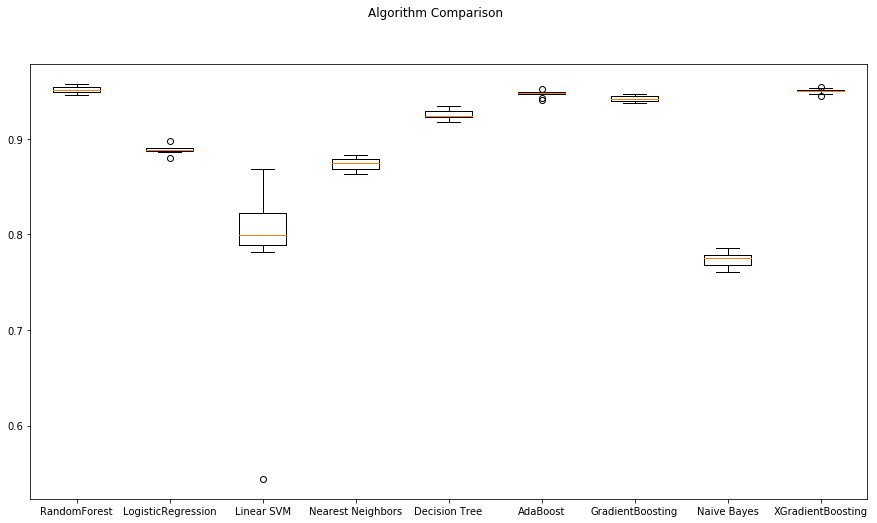

In [34]:
import matplotlib.pyplot as plt
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()